In [1]:
import mlflow
import pandas as pd
from boosted_lorenzetti.models.mlp import TrainingJob, KFoldTrainingJob
import plotly.express as px
tracking_uri = 'file:///root/workspaces/lorenzetti/mlruns'
mlflow.set_tracking_uri(tracking_uri)
experiment_name = 'test_experiment_kfold'
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='file:///root/workspaces/lorenzetti/mlruns/127216758375745240', creation_time=1753534914508, experiment_id='127216758375745240', last_update_time=1753534914508, lifecycle_stage='active', name='test_experiment_kfold', tags={}>

In [2]:
kfold_job = KFoldTrainingJob.from_mlflow('c311019aa98246d9a01f33d79567a9cb')
kfold_job

KFoldTrainingJob(dataset_path=PosixPath('/tmp/tmpqd0d7poo/test_dataset_path'), dims=[100, 1], activation='relu', df_name='data', batch_size=32, seed=1173545197, feature_cols=['ring_0', 'ring_1', 'ring_2', 'ring_3', 'ring_4', 'ring_5', 'ring_6', 'ring_7', 'ring_8', 'ring_9', 'ring_10', 'ring_11', 'ring_12', 'ring_13', 'ring_14', 'ring_15', 'ring_16', 'ring_17', 'ring_18', 'ring_19', 'ring_20', 'ring_21', 'ring_22', 'ring_23', 'ring_24', 'ring_25', 'ring_26', 'ring_27', 'ring_28', 'ring_29', 'ring_30', 'ring_31', 'ring_32', 'ring_33', 'ring_34', 'ring_35', 'ring_36', 'ring_37', 'ring_38', 'ring_39', 'ring_40', 'ring_41', 'ring_42', 'ring_43', 'ring_44', 'ring_45', 'ring_46', 'ring_47', 'ring_48', 'ring_49', 'ring_50', 'ring_51', 'ring_52', 'ring_53', 'ring_54', 'ring_55', 'ring_56', 'ring_57', 'ring_58', 'ring_59', 'ring_60', 'ring_61', 'ring_62', 'ring_63', 'ring_64', 'ring_65', 'ring_66', 'ring_67', 'ring_68', 'ring_69', 'ring_70', 'ring_71', 'ring_72', 'ring_73', 'ring_74', 'ring_75',

In [3]:
children = kfold_job.get_children_jobs(experiment_name=experiment_name,
                                       tracking_uri=tracking_uri)
children

[TrainingJob(dataset_path=PosixPath('/tmp/tmpqd0d7poo/test_dataset_path'), dims=[100, 1], activation='relu', df_name='data', batch_size=32, seed=1173545197, feature_cols=['ring_0', 'ring_1', 'ring_2', 'ring_3', 'ring_4', 'ring_5', 'ring_6', 'ring_7', 'ring_8', 'ring_9', 'ring_10', 'ring_11', 'ring_12', 'ring_13', 'ring_14', 'ring_15', 'ring_16', 'ring_17', 'ring_18', 'ring_19', 'ring_20', 'ring_21', 'ring_22', 'ring_23', 'ring_24', 'ring_25', 'ring_26', 'ring_27', 'ring_28', 'ring_29', 'ring_30', 'ring_31', 'ring_32', 'ring_33', 'ring_34', 'ring_35', 'ring_36', 'ring_37', 'ring_38', 'ring_39', 'ring_40', 'ring_41', 'ring_42', 'ring_43', 'ring_44', 'ring_45', 'ring_46', 'ring_47', 'ring_48', 'ring_49', 'ring_50', 'ring_51', 'ring_52', 'ring_53', 'ring_54', 'ring_55', 'ring_56', 'ring_57', 'ring_58', 'ring_59', 'ring_60', 'ring_61', 'ring_62', 'ring_63', 'ring_64', 'ring_65', 'ring_66', 'ring_67', 'ring_68', 'ring_69', 'ring_70', 'ring_71', 'ring_72', 'ring_73', 'ring_74', 'ring_75', 'ri

In [4]:
children_metrics_df, metric_names = TrainingJob.get_metrics_df(children)
children_metrics_df

,run_id,init,fold,completed,val_max_sp_tpr,train_loss_epoch,train_roc_auc_epoch,val_max_sp_fpr,val_max_sp_thresh,val_max_sp,train_max_sp_epoch,val_loss,train_max_sp_tpr_epoch,val_acc,train_acc_epoch,epoch,val_roc_auc,train_max_sp_fpr_epoch
0,d3d33e20c4ca4e23a6d92081d03d6e3a,4,4,True,0.290323,0.693343,0.522040,0.362069,0.490033,0.521188,0.590523,0.694045,0.394991,0.516667,0.478947,1.0,0.489155,0.591809
1,9af2fe2112f44829a83b282275867322,4,3,True,0.465116,0.693521,0.504734,0.588235,0.513379,0.561243,0.573524,0.703622,0.382147,0.441558,0.524823,1.0,0.548906,0.551856
2,8b5c11c1c14f4a038b69a9f4c094399c,4,2,True,0.540541,0.693258,0.519053,0.659091,0.507713,0.554767,0.597694,0.691364,0.447474,0.543210,0.505967,1.0,0.554054,0.663999
3,793b045be13b4a2284be15b44d1f73d8,4,1,True,0.591837,0.693005,0.557859,0.626866,0.496405,0.511639,0.624754,0.696297,0.348274,0.422414,0.507812,1.0,0.458270,0.641959
4,2f9e59046bd947a5aa4090ab01ae2dcb,4,0,True,0.509434,0.693267,0.469314,0.679245,0.501959,0.581064,0.555166,0.693960,0.426633,0.500000,0.515228,1.0,0.516198,0.564925
5,c79a41c7af1749f588fe34f2c7d81e79,3,4,True,0.725806,0.694166,0.510853,0.862069,0.520516,0.525562,0.576901,0.699511,0.357697,0.483333,0.521053,1.0,0.476085,0.547445
6,a357f13c89064f18ae6b9edcdf2d07be,3,3,True,0.348837,0.693595,0.513602,0.382353,0.513575,0.507788,0.582410,0.703792,0.442007,0.441558,0.524823,1.0,0.452120,0.627976
7,243c96aa75494429b6436506b9aa02f7,3,2,True,0.324324,0.693246,0.498855,0.522727,0.506620,0.596746,0.574488,0.691480,0.322024,0.543210,0.505967,1.0,0.563268,0.512095
8,aa588f38713940789c37742d7df3f0b1,3,1,True,0.367347,0.693198,0.516009,0.507463,0.507512,0.568332,0.587180,0.692483,0.426471,0.577586,0.492188,1.0,0.539446,0.627455
9,865d35138ffa4d4e83ed190818ad81f2,3,0,True,0.622642,0.693401,0.524768,0.641509,0.488247,0.500649,0.586130,0.693541,0.355431,0.500000,0.484772,1.0,0.435030,0.561178


In [8]:
aggregation = dict()
for metric in metric_names:
    aggregation[f'{metric}_mean'] = pd.NamedAgg(column=metric, aggfunc='mean')
    aggregation[f'{metric}_std'] = pd.NamedAgg(column=metric, aggfunc='std')
    aggregation[f'{metric}_min'] = pd.NamedAgg(column=metric, aggfunc='min')
    aggregation[f'{metric}_max'] = pd.NamedAgg(column=metric, aggfunc='max')
    aggregation[f'{metric}_median'] = pd.NamedAgg(column=metric, aggfunc='median')
aggregated_metrics = children_metrics_df \
    .groupby('fold').agg(**aggregation) \
    .reset_index() \
    .melt(id_vars='fold',
          var_name='metric')
aggregated_metrics

,fold,metric,value
0,0,train_roc_auc_epoch_mean,0.506385
1,1,train_roc_auc_epoch_mean,0.518321
2,2,train_roc_auc_epoch_mean,0.512653
3,3,train_roc_auc_epoch_mean,0.494790
4,4,train_roc_auc_epoch_mean,0.509292
...,...,...,...
345,0,val_max_sp_tpr_median,0.509434
346,1,val_max_sp_tpr_median,0.367347
347,2,val_max_sp_tpr_median,0.378378
348,3,val_max_sp_tpr_median,0.441860


In [19]:
fig = px.box(children_metrics_df, x="fold", y='val_max_sp')
fig.update_layout(
    title=f'K-Fold val_max_sp Distribution',
    xaxis_title='Fold',
    yaxis_title='val_max_sp'
)
fig.add_hline(y=0.603,
                line_dash="dash",
                line_color="red",
                annotation_text="val_max_sp",
                annotation_position="top left")
fig.show()

In [10]:
with mlflow.start_run(run_name='plotly test'):
    aggregated_metrics.to_csv('aggregated_metrics.csv', index=False)
    mlflow.log_artifact('aggregated_metrics.csv')
    mlflow.log_figure(fig, 'val_loss_box_plot.html')

In [11]:
import matplotlib.pyplot as plt

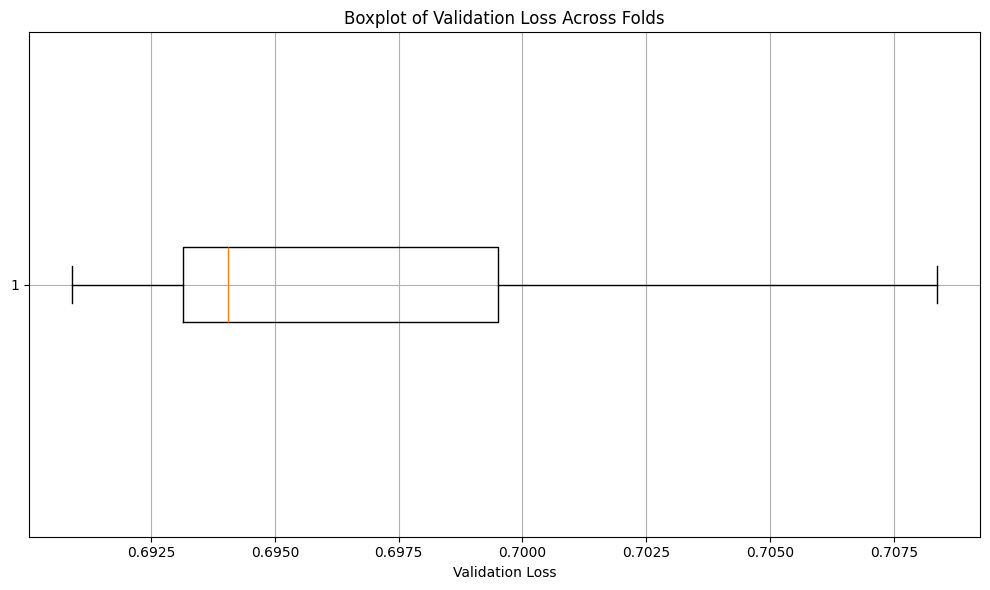

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(children_metrics_df['val_loss'], vert=False)
ax.set_xlabel('Validation Loss')
ax.set_title('Boxplot of Validation Loss Across Folds')
ax.grid(True)
fig.tight_layout()

In [17]:
import mpld3
with open("index.html","w") as html_file:
    html_file.write(mpld3.fig_to_html(fig))

/opt/conda/envs/dev/lib/python3.11/site-packages/mpld3/mplexporter/utils.py:300: MatplotlibDeprecationWarning:

The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.

/opt/conda/envs/dev/lib/python3.11/site-packages/mpld3/mplexporter/utils.py:303: MatplotlibDeprecationWarning:

The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.

/opt/conda/envs/dev/lib/python3.11/site-packages/mpld3/mplexporter/utils.py:306: MatplotlibDeprecationWarning:

The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.

/opt/conda/envs/dev/lib/python3.11/site-packages/mpld3/mplexporter/utils.py:300: MatplotlibDeprecationWarning:

The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter method